## **Author Name: Rizon Kumar Rahi**

## **Organisation : The Sparks Foundation**

## Task 5  Exploratory Data Analysis - Sports

As a sports analysts, find out the most successful teams, players and factors
contributing win or loss of a team.


## Step 1: Importing the libraries

In [21]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Step 2 : Reading the dataset

Reading Matches Dataset 

In [6]:
matches_df = pd.read_csv("C:\\Users\\Rizon\\Downloads\\matches.csv")
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


Reading deliveries dataset

In [7]:
deliv_df = pd.read_csv("C:\\Users\\Rizon\\Downloads\\deliveries.csv")
deliv_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [8]:
matches_df.shape # mathes dataset shape

(756, 18)

In [9]:
deliv_df.shape #deliver dataset shape

(179078, 21)

In [10]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [11]:
deliv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

## Unique value in each columns (matches)

In [12]:
for i in matches_df.columns:
    print(i, len(matches_df[i].unique()))

id 756
season 12
city 33
date 546
team1 15
team2 15
toss_winner 15
toss_decision 2
result 3
dl_applied 2
winner 16
win_by_runs 89
win_by_wickets 11
player_of_match 227
venue 41
umpire1 62
umpire2 66
umpire3 26


## Unique value in each columns (deliveries)

In [14]:
for i in deliv_df.columns:
    print(i, len(deliv_df[i].unique()))

match_id 756
inning 5
batting_team 15
bowling_team 15
over 20
ball 9
batsman 516
non_striker 511
bowler 405
is_super_over 2
wide_runs 6
bye_runs 5
legbye_runs 6
noball_runs 5
penalty_runs 2
batsman_runs 8
extra_runs 7
total_runs 10
player_dismissed 488
dismissal_kind 10
fielder 500


In [15]:
list_columns = matches_df.columns
list_columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [16]:
list_columns = deliv_df.columns
list_columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## Step 3 : To find the  averge, min, max for cont. var

In [17]:
matches_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [19]:
deliv_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


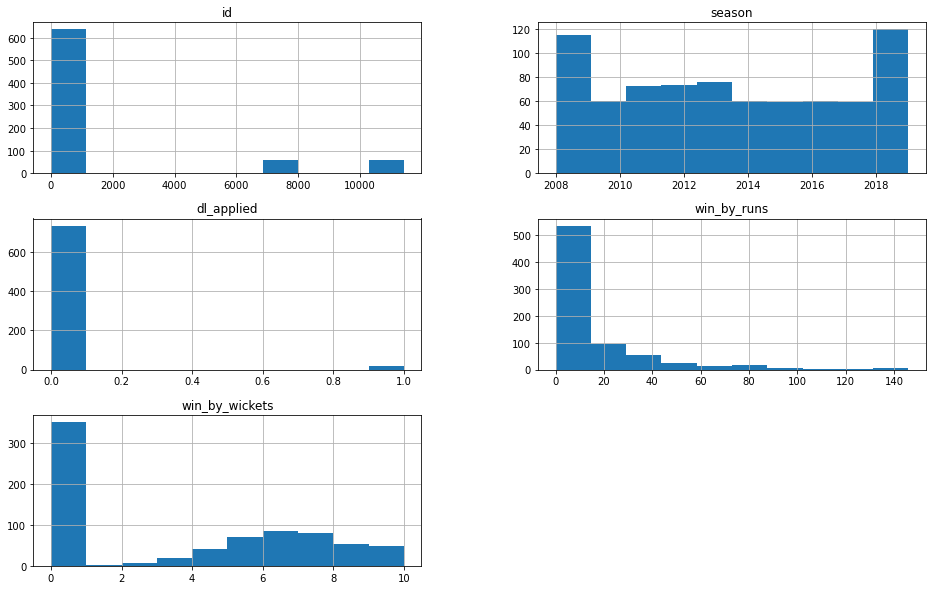

In [20]:
matches_df.hist(figsize=(16, 10))
plt.show()

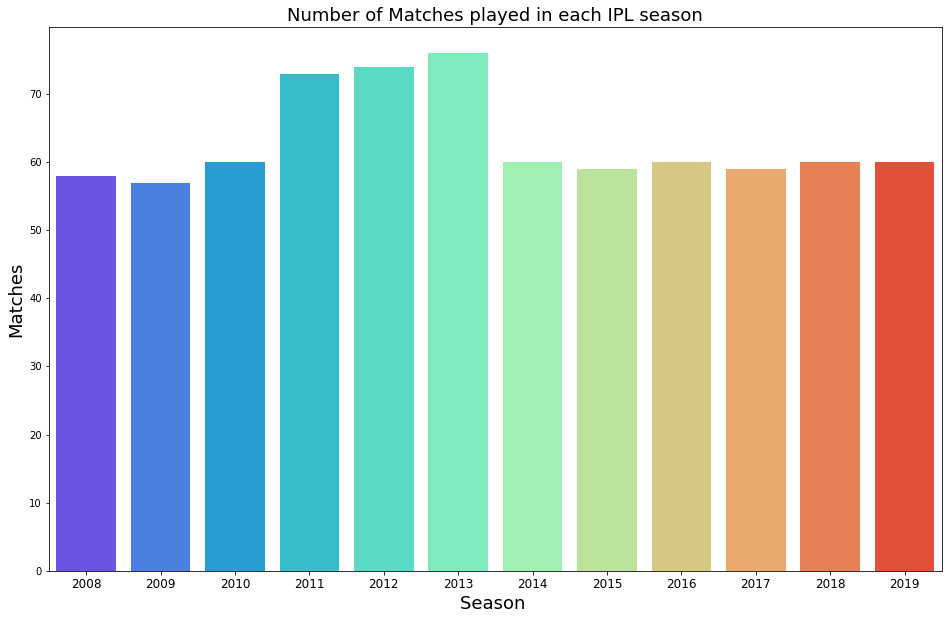

In [24]:
plt.figure(figsize = (16, 10))
sns.countplot('season', data=matches_df, palette="rainbow")
plt.title("Number of Matches played in each IPL season", fontsize=18)
plt.xticks(fontsize=12)
plt.xlabel("Season ", fontsize=18)
plt.ylabel("Matches", fontsize=18)
plt.show()

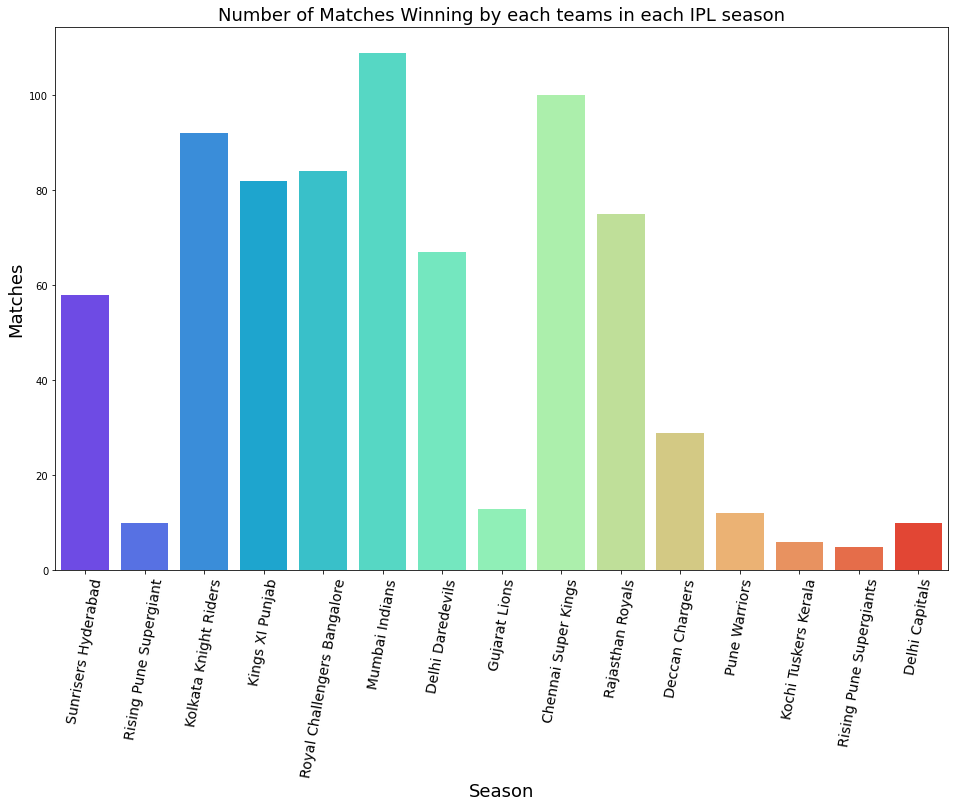

In [26]:
plt.figure(figsize = (16, 10))
sns.countplot('winner', data=matches_df, palette="rainbow")
plt.title("Number of Matches Winning by each teams in each IPL season", fontsize=18)
plt.xticks(rotation = 80, fontsize=14)
plt.xlabel("Season", fontsize=18)
plt.ylabel("Matches", fontsize=18)
plt.show()

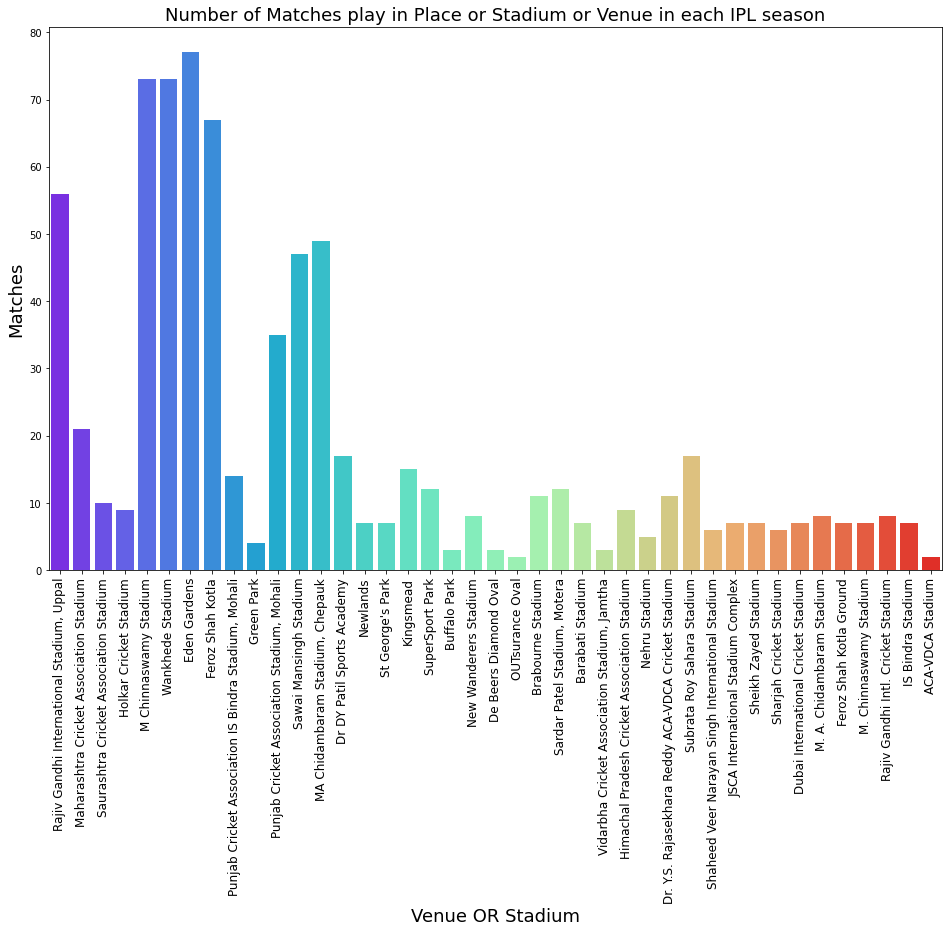

In [28]:
plt.figure(figsize = (16, 10))
sns.countplot('venue', data=matches_df, palette="rainbow")
plt.title("Number of Matches play in Place or Stadium or Venue in each IPL season", fontsize=18)
plt.xticks(rotation = 90, fontsize = 12)
plt.xlabel("Venue OR Stadium", fontsize = 18)
plt.ylabel('Matches', fontsize = 18)
plt.show()

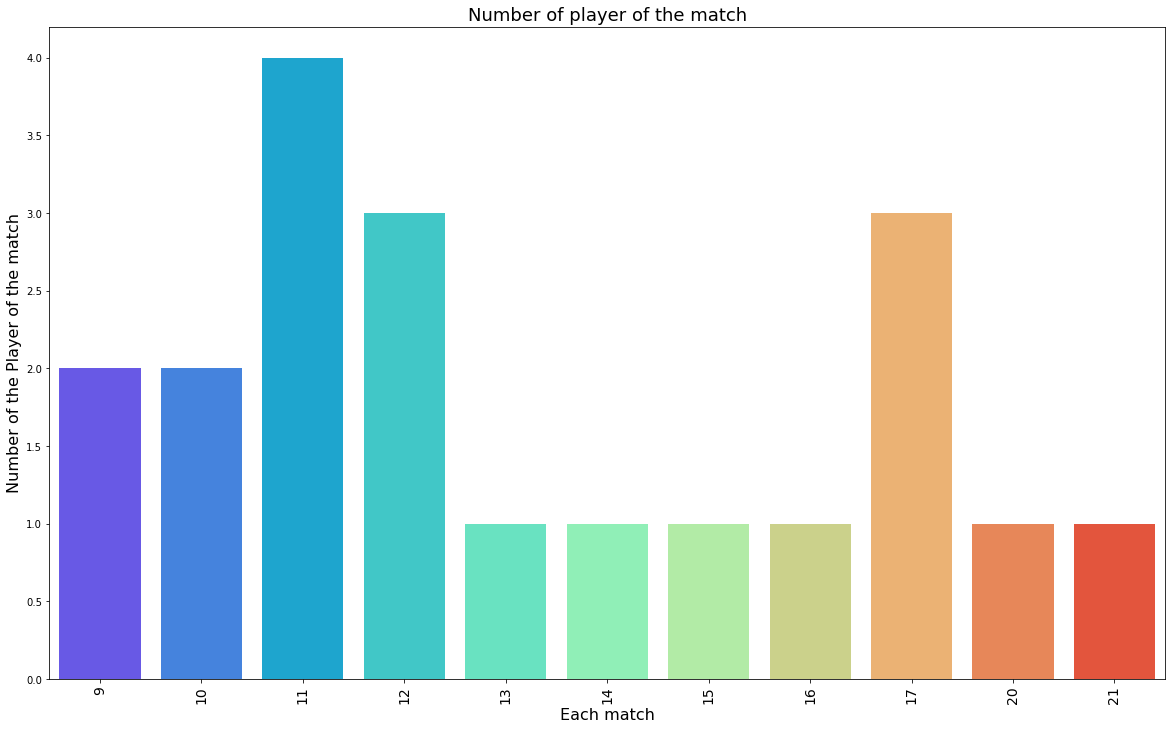

In [29]:
plt.figure(figsize = (20, 12))
sns.countplot(matches_df['player_of_match'].value_counts()[:20], data=matches_df, palette="rainbow")
plt.title("Number of player of the match", fontsize=18)
plt.xticks(rotation = 90, fontsize = 14)
plt.xlabel("Each match", fontsize = 16)
plt.ylabel("Number of the Player of the match", fontsize = 16)
plt.show()

In [30]:
data_group = matches_df.groupby('season')['team1', 'team2'].agg(sum)
print("The Team-1 Vs Team-2")
data_group

The Team-1 Vs Team-2


,team1,team2
season,,
2008,Kolkata Knight RidersChennai Super KingsRajast...,Royal Challengers BangaloreKings XI PunjabDelh...
2009,Mumbai IndiansRoyal Challengers BangaloreKings...,Chennai Super KingsRajasthan RoyalsDelhi Dared...
2010,Kolkata Knight RidersMumbai IndiansKings XI Pu...,Deccan ChargersRajasthan RoyalsDelhi Daredevil...
2011,Chennai Super KingsDeccan ChargersKochi Tusker...,Kolkata Knight RidersRajasthan RoyalsRoyal Cha...
2012,Chennai Super KingsKolkata Knight RidersPune W...,Mumbai IndiansDelhi DaredevilsMumbai IndiansKi...
2013,Delhi DaredevilsRoyal Challengers BangaloreSun...,Kolkata Knight RidersMumbai IndiansPune Warrio...
2014,Kolkata Knight RidersDelhi DaredevilsChennai S...,Mumbai IndiansRoyal Challengers BangaloreKings...
2015,Mumbai IndiansChennai Super KingsRajasthan Roy...,Kolkata Knight RidersDelhi DaredevilsKings XI ...
2016,Mumbai IndiansDelhi DaredevilsKings XI PunjabR...,Rising Pune SupergiantsKolkata Knight RidersGu...


In [33]:
print("The following list of the winner of teams How many Runs and How many Wickets by they won")
data_group = matches_df.groupby('winner')['win_by_runs', 'win_by_wickets'].agg(sum)
data_group

The following list of the winner of teams How many Runs and How many Wickets by they won


,win_by_runs,win_by_wickets
winner,,
Chennai Super Kings,1778,289
Deccan Chargers,421,72
Delhi Capitals,92,29
Delhi Daredevils,675,275
Gujarat Lions,1,65
Kings XI Punjab,925,268
Kochi Tuskers Kerala,23,30
Kolkata Knight Riders,1086,351
Mumbai Indians,1866,307


<function matplotlib.pyplot.show(close=None, block=None)>

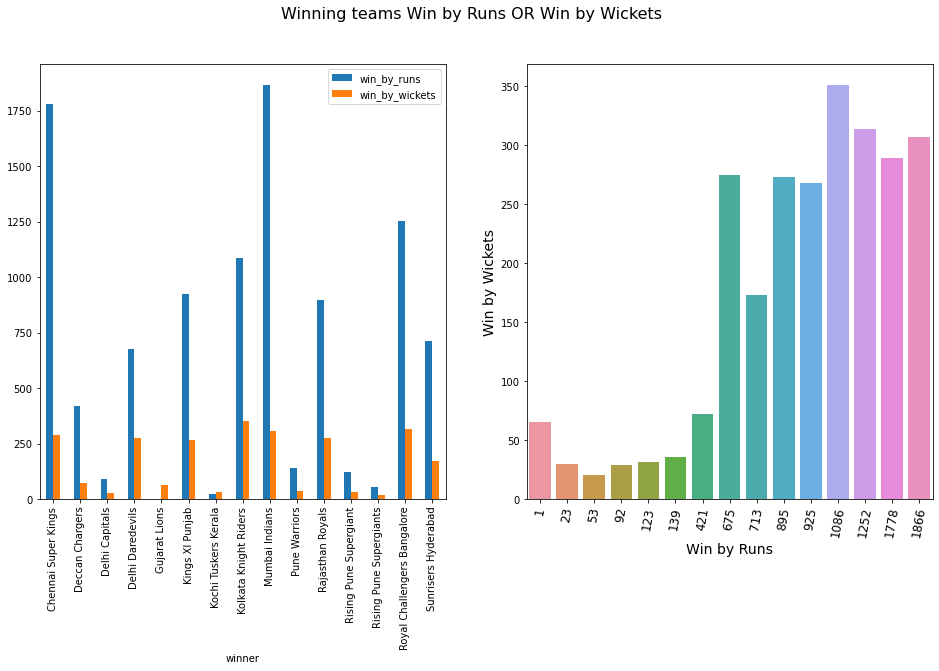

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle("Winning teams Win by Runs OR Win by Wickets", fontsize=16)
sns.barplot(data = data_group, x = 'win_by_runs', y ='win_by_wickets', ax=axes[1])
data_group.plot(kind='bar', ax = axes[0])
plt.xticks(rotation= 80, fontsize = 12)
plt.xlabel('Win by Runs', fontsize = 14)
plt.ylabel('Win by Wickets', fontsize = 14)
plt.show

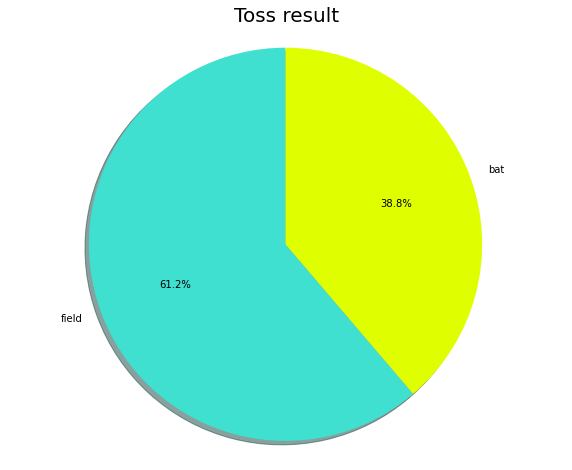

In [35]:
# we will plot pie chart on Toss decision
Toss = matches_df.toss_decision.value_counts()
labels = np.array(Toss.index)
sizes = Toss.values

colors = ['#40E0D0', '#DFFF00']
plt.figure(figsize = (10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss result', fontsize=20)
plt.axis('equal')
plt.show()

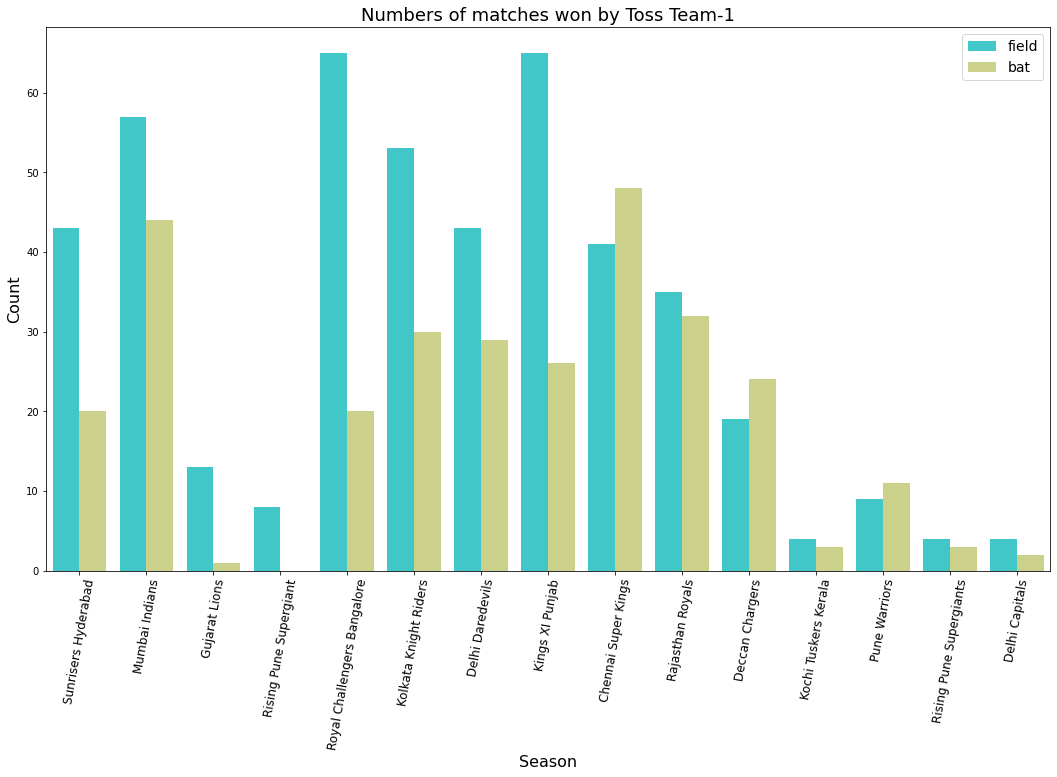

In [36]:
# we will plot graph on Numbers of matches won by Toss result
plt.figure(figsize = (18, 10))
sns.countplot('team1', hue='toss_decision', data = matches_df, palette='rainbow')
plt.title("Numbers of matches won by Toss Team-1", fontsize=18)
plt.xticks(rotation= 80, fontsize = 12)
plt.xlabel("Season", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.legend(fontsize=14)
plt.show()

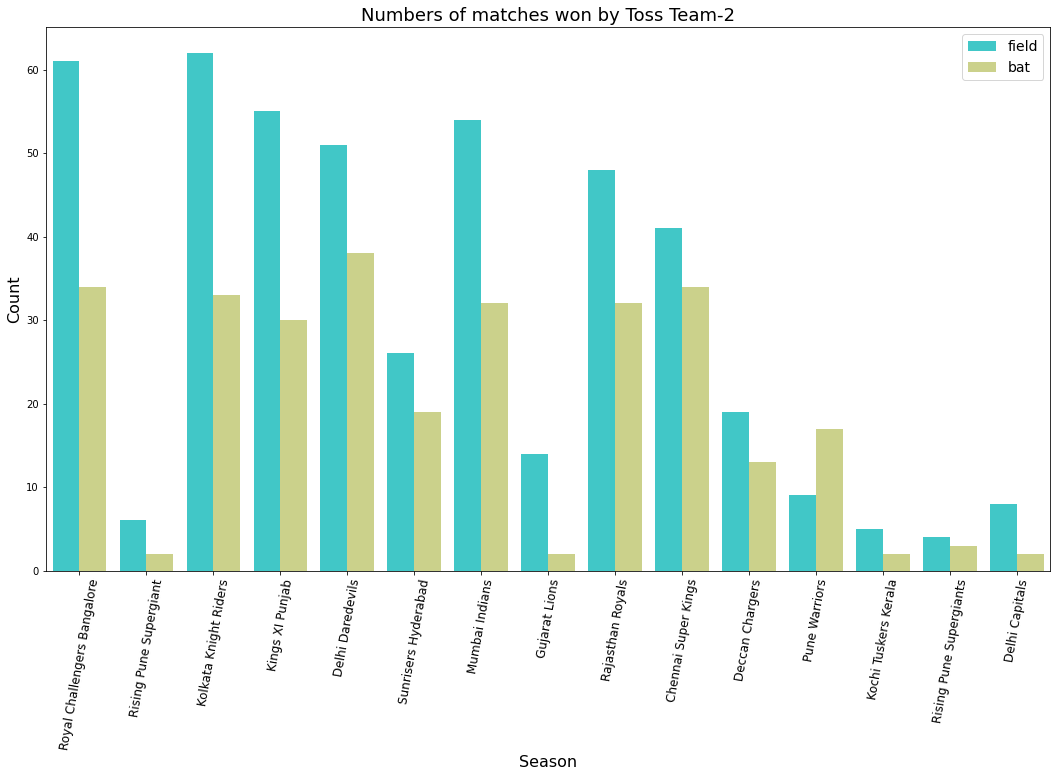

In [37]:
# we will plot graph on Numbers of matches won by Toss result
plt.figure(figsize = (18, 10))
sns.countplot('team2', hue='toss_decision', data = matches_df, palette='rainbow')
plt.title("Numbers of matches won by Toss Team-2", fontsize=18)
plt.xticks(rotation= 80, fontsize = 12)
plt.xlabel("Season", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.legend(fontsize=14)
plt.show()

In [38]:
# we will print winner season wise

final_matches = matches_df.drop_duplicates(subset=['season'], keep='last')

final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


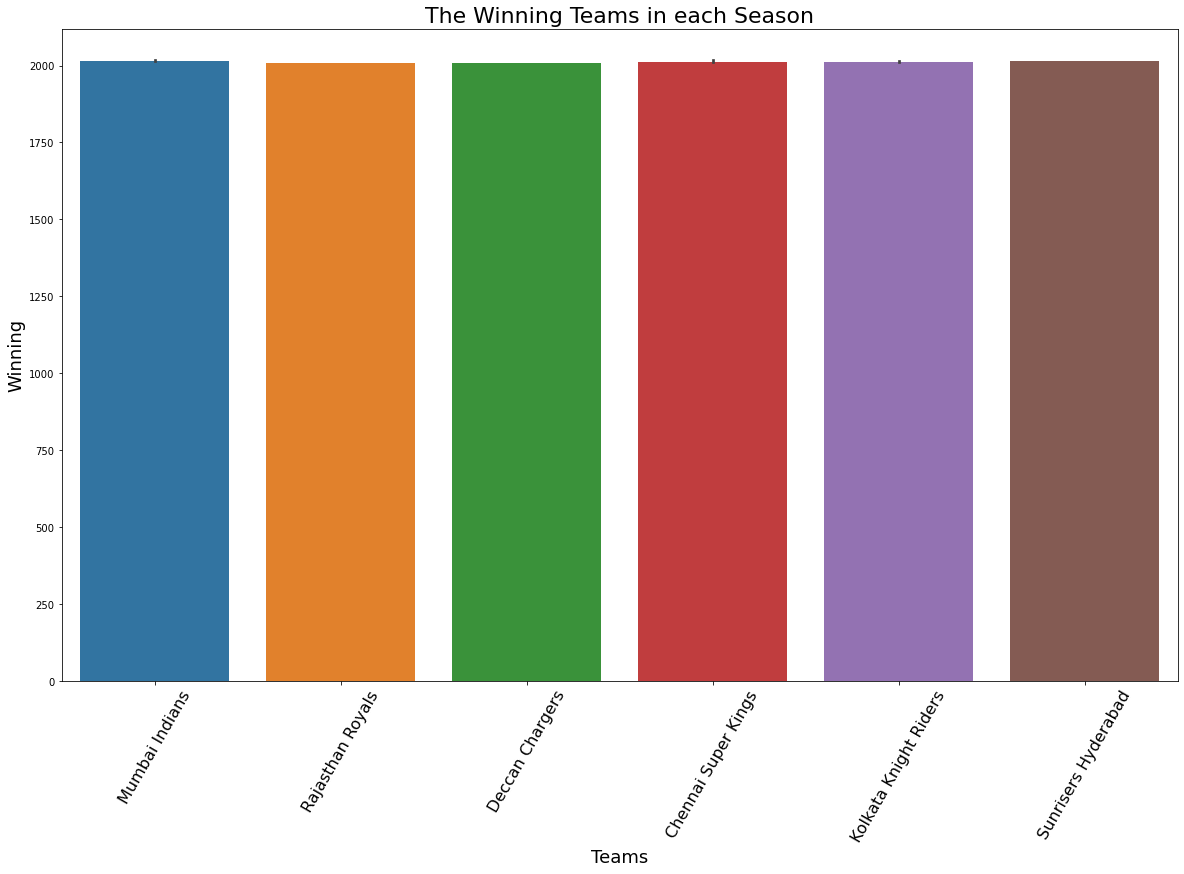

In [39]:
plt.figure(figsize=(20, 12))
sns.barplot(x = final_matches['winner'], y = final_matches['season'])
plt.title("The Winning Teams in each Season", fontsize=22)
plt.xticks(rotation= 60, fontsize = 16)
plt.xlabel("Teams", fontsize = 18)
plt.ylabel("Winning", fontsize = 18)
plt.show()

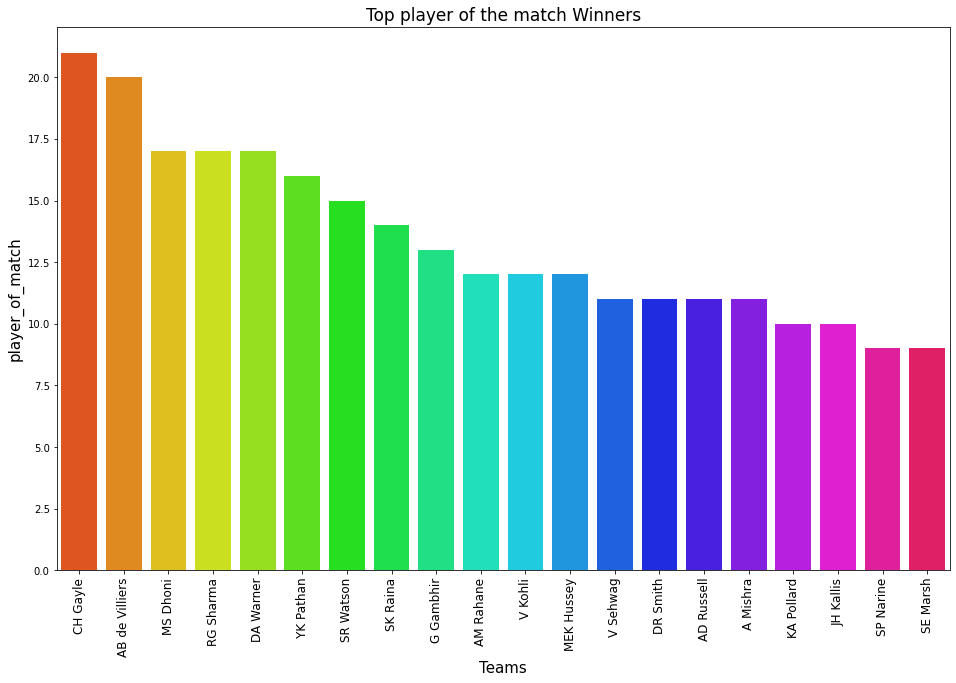

In [40]:
# we will print name of top player in IPL
top_players = matches_df.player_of_match.value_counts()[:20]

plt.figure(figsize = (16, 10))
plt.title("Top player of the match Winners", fontsize = 17)

plt.xticks(rotation= 60, fontsize = 12)
plt.xlabel("Teams", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="hsv");
plt.show()

In [41]:
final_matches.groupby(['city', 'winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

In [42]:
# we will print number of season won by teams
final_matches["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

In [43]:
# we will print toss winner, toss decision, winner in final matches.
final_matches[['toss_winner','toss_decision', 'winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


In [44]:
# we will print man of the match
final_matches[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


In [45]:
print("The number of times Teams Win match and toss both ", len(final_matches[final_matches['toss_winner']==final_matches['winner']]['winner']))

The number of times Teams Win match and toss both  9


In [46]:
deliv_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [48]:
list_columns = deliv_df.columns
list_columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

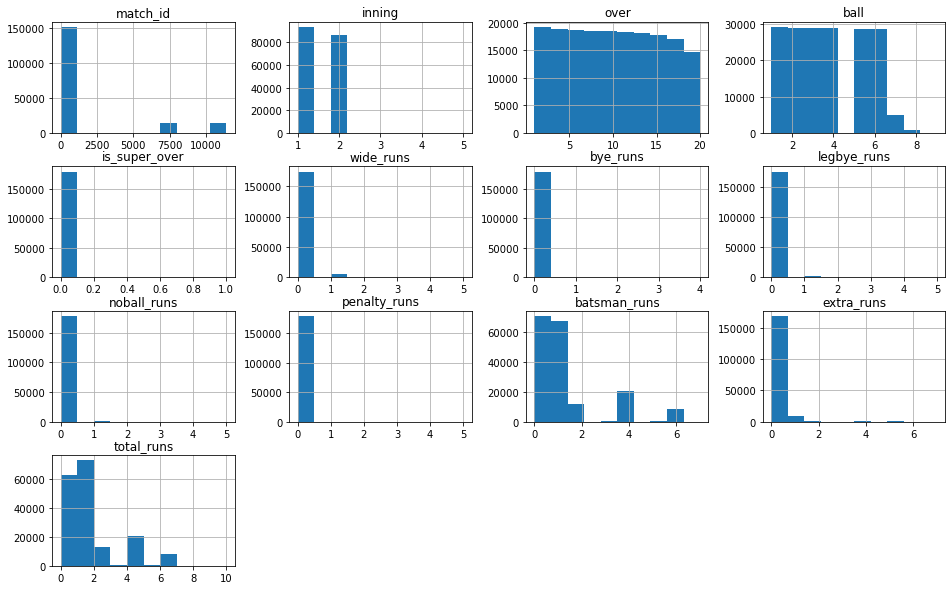

In [49]:
deliv_df.hist(figsize=(16, 10))
plt.show()

In [50]:
season_data = matches_df[['id','season','winner']]
complete_data = deliv_df.merge(season_data, how='inner', left_on='match_id', right_on='id')

In [51]:
zero_data = complete_data[complete_data['batsman_runs'] == 0]
zero_data.groupby('batting_team')['batsman_runs'].agg([('No_runs','sum'), ('zero','count')])

,No_runs,zero
batting_team,,
Chennai Super Kings,0,7608
Deccan Chargers,0,3673
Delhi Capitals,0,660
Delhi Daredevils,0,7472
Gujarat Lions,0,1345
Kings XI Punjab,0,8259
Kochi Tuskers Kerala,0,696
Kolkata Knight Riders,0,8329
Mumbai Indians,0,9242


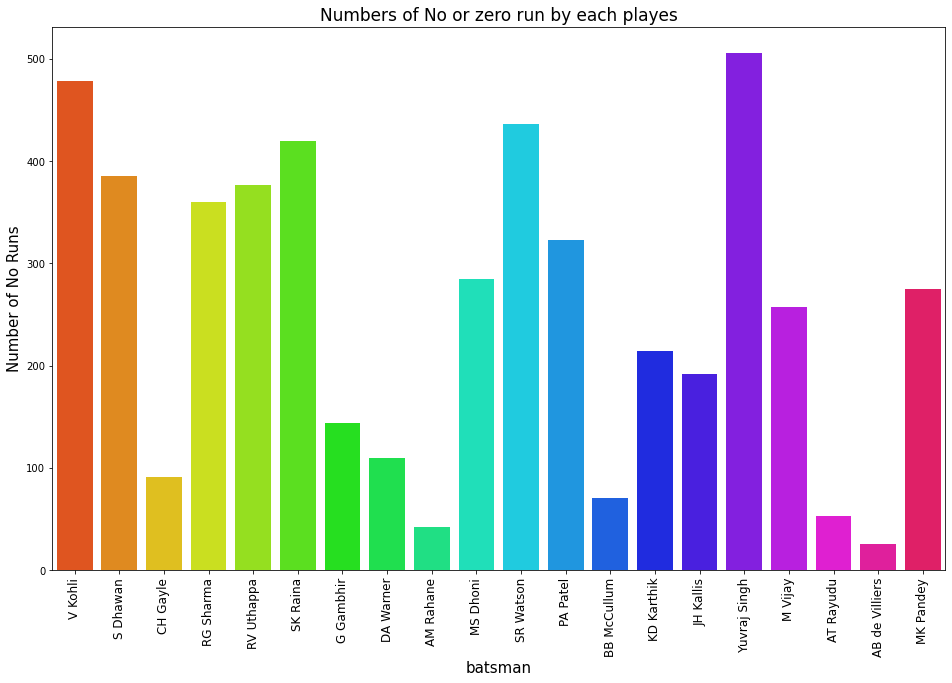

In [52]:
# Zero run top frequently run made in each match

batsman_zero = zero_data.groupby('batsman')['batsman_runs'].agg([('zero', 'count')]).reset_index().sort_values('zero', ascending=0)
batsman_zero = batsman_zero.iloc[:20, :]

plt.figure(figsize = (16, 10))
plt.title("Numbers of No or zero run by each playes", fontsize = 17)
plt.xticks(rotation= 60, fontsize = 12)
plt.xlabel("Player Name", fontsize = 15)
plt.ylabel("Number of No Runs", fontsize = 15)

top_players.plot.bar()
sns.barplot(x = batsman_zero.batsman, y = batsman_zero.zero.index, orient='v', palette="hsv")
plt.show()

In [53]:
# we will print numbers of fours hit by team

four_data = complete_data[complete_data['batsman_runs']==4]
four_data.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])

,runs by fours,fours
batting_team,,
Chennai Super Kings,8772,2193
Deccan Chargers,3828,957
Delhi Capitals,968,242
Delhi Daredevils,8632,2158
Gujarat Lions,1840,460
Kings XI Punjab,9832,2458
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,9736,2434
Mumbai Indians,10352,2588


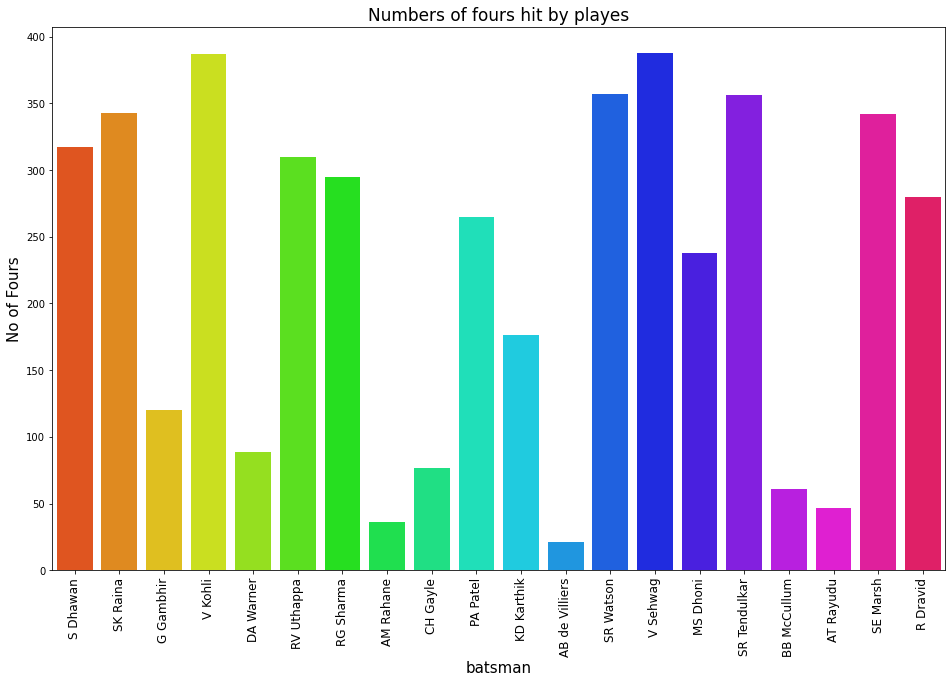

In [54]:
# Four run top frequently run made in each match
batsman_four = four_data.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four', ascending=0)
batsman_four = batsman_four.iloc[:20, :]

plt.figure(figsize = (16, 10))
plt.title("Numbers of fours hit by playes", fontsize = 17)
plt.xticks(rotation= 60, fontsize = 12)
plt.xlabel("Player Name", fontsize = 15)
plt.ylabel("No of Fours", fontsize = 15)

top_players.plot.bar()
sns.barplot(x = batsman_four.batsman, y = batsman_four.four.index, orient='v', palette="hsv")
plt.show()

In [56]:
six_data = complete_data[complete_data['batsman_runs']==6]
six_data.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('six','count')])

,runs by fours,six
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


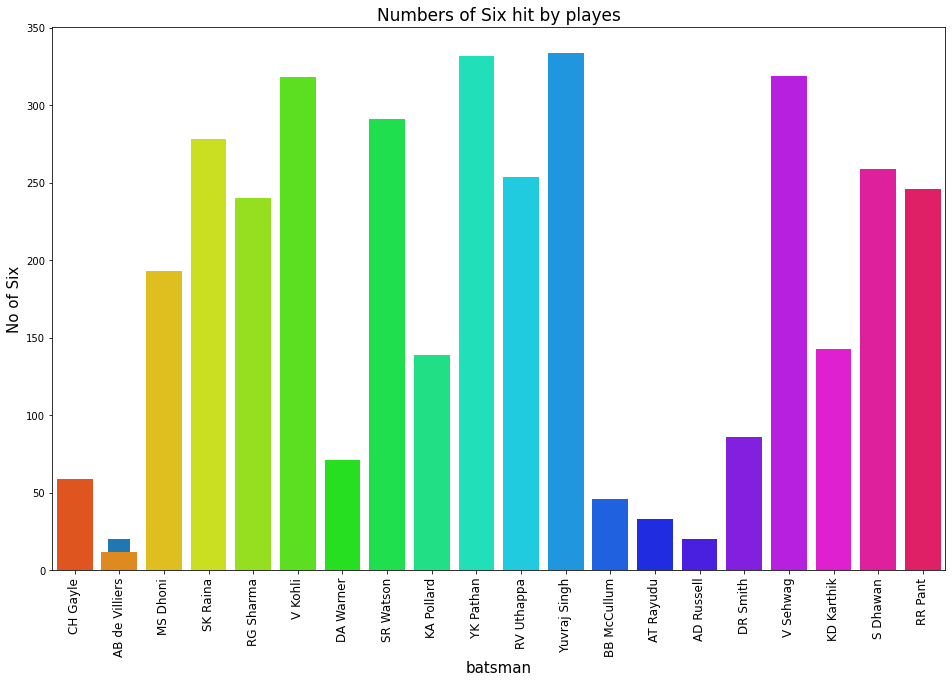

In [57]:
# Six run top frequently run made in each match

batsman_six = six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six', ascending=0)
batsman_six = batsman_six.iloc[:20, :]

plt.figure(figsize = (16, 10))
plt.title("Numbers of Six hit by playes", fontsize = 17)

plt.xticks(rotation= 60, fontsize = 12)
plt.xlabel("Player Name", fontsize = 15)
plt.ylabel("No of Six", fontsize = 15)

top_players.plot.bar()
sns.barplot(x = batsman_six.batsman, y = batsman_six.six.index, orient='v', palette="hsv")
plt.show()

In [58]:
# We will print the top 10 leading run scorer in Sport

batsman_score = deliv_df.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score = batsman_score.rename(columns={'sum':'batsman_runs'})

print(" Top 10 Leading Run Scorer in IPL ")
batsman_score.iloc[:10, :]

 Top 10 Leading Run Scorer in IPL 


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


In [59]:
# we will print no of matches played by batsman

No_Matches_player= deliv_df[["match_id","player_dismissed"]]
No_Matches_player =No_Matches_player .groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
No_Matches_player.columns=["batsman","No_of Matches"]
No_Matches_player .head(5)

,batsman,No_of Matches
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137


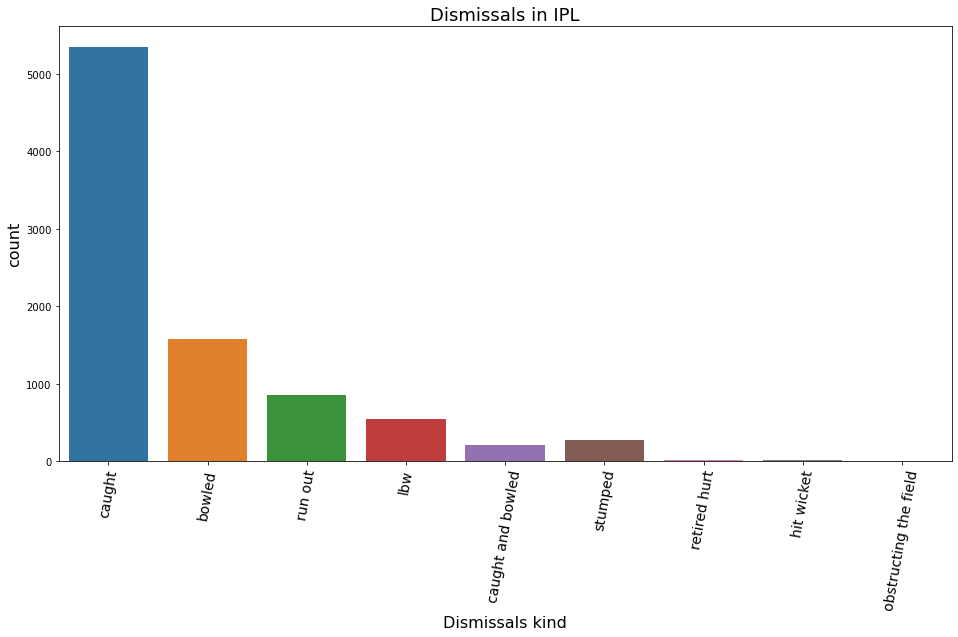

In [60]:
# Dismissals in IPL

plt.figure(figsize=(16, 8))
ax=sns.countplot(deliv_df.dismissal_kind)
plt.title("Dismissals in IPL", fontsize=18)
plt.xticks(rotation=80, fontsize=14)
plt.xlabel("Dismissals kind", fontsize=16)
plt.ylabel("count", fontsize=16)
plt.show()

In [62]:
wicket_data = deliv_df.dropna(subset=['dismissal_kind'])
wicket_data = wicket_data[wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]

In [63]:

# we will print most wicket taking bowlers
wicket_data = wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]
wicket_data

,bowler,count
0,R Vinay Kumar,22
1,DJ Bravo,21
2,IK Pathan,19
3,SL Malinga,18
4,Z Khan,17
5,UT Yadav,17
6,SR Watson,15
7,A Nehra,15
8,JP Faulkner,15
9,SP Narine,15


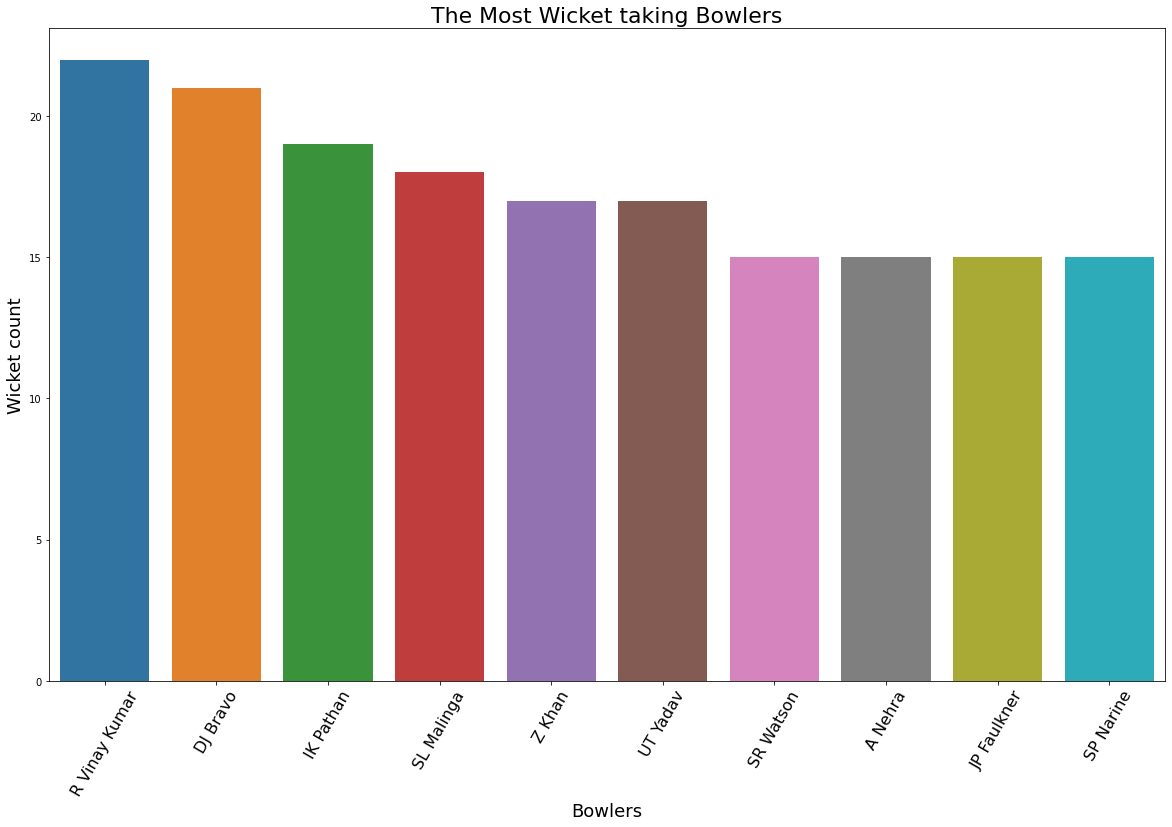

In [64]:
plt.figure(figsize=(20, 12))
sns.barplot(x = wicket_data['bowler'], y = wicket_data['count'])
plt.title("The Most Wicket taking Bowlers", fontsize=22)
plt.xticks(rotation= 60, fontsize = 16)
plt.xlabel("Bowlers", fontsize = 18)
plt.ylabel("Wicket count", fontsize = 18)
plt.show()

## Conclusion :

1. The number of matches is 12 in payed between 2008 to 2019 years
2. The Mumbai indians, Deccan Chargers, Rajestan Royals, Chennai Superking, Kolkatta knight Riders, Sunrisers Hyderabad teams   are equally won the matches
3. The maximum number of matches won by Mumbai Indians.
4. CH Gayle the best player of the matches between 2008 to 2019 years of matches
5. The Most Wicket taking player was R Vinay Kumar

## Thank you!!